In [1]:
# Multiple Correspondence Analysis (MCA) for identification of discriminitive SNPs

In [1]:
# Install prince library
!pip install prince

In [2]:
# Import dependencies
import pandas as pd
import prince
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
file_path = './Resources/kidd_train.csv'
df = pd.read_csv(file_path, delimiter=',')
df.head()

,id,rs3737576,rs7554936,rs2814778,rs798443,rs1876482,rs1834619,rs3827760,rs260690,rs6754311,...,rs11652805,rs2042762,rs7226659,rs3916235,rs4891825,rs7251928,rs310644,rs2024566,superpopulation,gender
0,1762,TT,CC,CC,GG,GG,GG,AA,CC,CC,...,CC,TT,GG,TC,GG,CC,CC,AA,AFR,male
1,2503,TT,CT,TT,AA,GG,AA,AA,AA,CC,...,TT,TT,GT,CC,AA,AA,TT,AG,SAS,female
2,1525,TT,CC,TT,AA,GG,GG,AA,AA,TC,...,TT,TT,GG,CC,AA,AA,CC,AA,SAS,male
3,1624,TT,TT,TT,AG,GG,GG,AA,AA,CC,...,TT,TT,GG,CT,AG,AA,CT,AG,SAS,male
4,1684,TT,TT,TT,GA,GG,GG,AA,AA,TT,...,TT,TT,GG,CC,AA,AC,TC,GG,EUR,female


In [4]:
# Replace missing values with 'NN'
df_filled = df.fillna('NN')
df_filled.head()

,id,rs3737576,rs7554936,rs2814778,rs798443,rs1876482,rs1834619,rs3827760,rs260690,rs6754311,...,rs11652805,rs2042762,rs7226659,rs3916235,rs4891825,rs7251928,rs310644,rs2024566,superpopulation,gender
0,1762,TT,CC,CC,GG,GG,GG,AA,CC,CC,...,CC,TT,GG,TC,GG,CC,CC,AA,AFR,male
1,2503,TT,CT,TT,AA,GG,AA,AA,AA,CC,...,TT,TT,GT,CC,AA,AA,TT,AG,SAS,female
2,1525,TT,CC,TT,AA,GG,GG,AA,AA,TC,...,TT,TT,GG,CC,AA,AA,CC,AA,SAS,male
3,1624,TT,TT,TT,AG,GG,GG,AA,AA,CC,...,TT,TT,GG,CT,AG,AA,CT,AG,SAS,male
4,1684,TT,TT,TT,GA,GG,GG,AA,AA,TT,...,TT,TT,GG,CC,AA,AC,TC,GG,EUR,female


In [5]:
# Separate features and labels
X = df.iloc[:, 1:56]  # SNIPs
y_ethnic = df.iloc[:, 57]  # Superpopulation

In [21]:
# Define genotype encoding mapping
genotype_mapping = {
    'AA': 0, # reference/reference
    'CC': 0, # reference/reference
    'AT': 1, # reference/alternate
    'AG': 1, # reference/alternate
    'GA': 1, # reference/alternate
    'AC': 1, # Reference/alternate
    'CG': 1, # reference/alternate
    'CT': 1, # reference/alternate
    'TC': 1, # reference/alternate
    'TT': 2, # alternate/alternate
    'GG': 2, # alternate/alternate   
    'Unknown': 3
}

In [22]:
# Apply genotype encoding
X_encoded = X.applymap(lambda x: genotype_mapping.get(x, 3))
print(X_encoded.head())

   rs3737576  rs7554936  rs2814778  rs798443  rs1876482  rs1834619  rs3827760  \
0          2          0          0         2          2          2          0   
1          2          1          2         0          2          0          0   
2          2          0          2         0          2          2          0   
3          2          2          2         1          2          2          0   
4          2          2          2         1          2          2          0   

   rs260690  rs6754311  rs10497191  ...  rs17642714  rs4471745  rs11652805  \
0         0          0           2  ...           0          2           0   
1         0          0           0  ...           0          2           2   
2         0          1           0  ...           0          2           2   
3         0          0           1  ...           0          1           2   
4         0          2           1  ...           3          2           2   

   rs2042762  rs7226659  rs3916235  rs489182

C:\Users\Katrina\AppData\Local\Temp\ipykernel_1236\3248816816.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X.applymap(lambda x: genotype_mapping.get(x, 3))


In [25]:
# Perform MCA
mca = prince.MCA(n_components=2, 
                 n_iter=3, 
                 copy=True, 
                 check_input=True, 
                 engine='sklearn', 
                 random_state=42)

mca = mca.fit(X_encoded)

# Transform the data
X_mca = mca.transform(X_encoded)

In [26]:
# Get the principal components
principal_components = mca.column_coordinates(X_encoded)

In [27]:
# Get the eigenvalues
eigenvalues = mca.eigenvalues_

In [28]:
# Calculate explained inertia (variance)
explained_inertia = eigenvalues / eigenvalues.sum()

# Cumulative explained inertia
cumulative_explained_inertia = np.cumsum(explained_inertia)


In [29]:
# Display the contributions
for i, var in enumerate(cumulative_explained_inertia):
    print(f"Components {i+1}: Cumulative Explained Variance = {var:.2f}")

Components 1: Cumulative Explained Variance = 0.61
Components 2: Cumulative Explained Variance = 1.00


In [31]:
# Ensure the dimensions are correct
print("Principal Components Shape:", principal_components.shape)
print("Feature Names Shape:", len(X.columns))

Principal Components Shape: (165, 2)
Feature Names Shape: 55


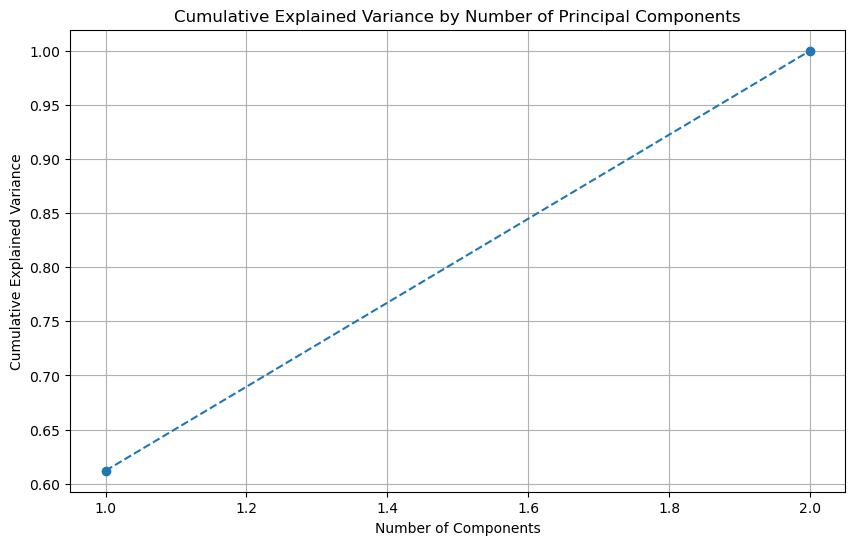

In [32]:
# Plot cumulative explained inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_inertia) + 1), cumulative_explained_inertia, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


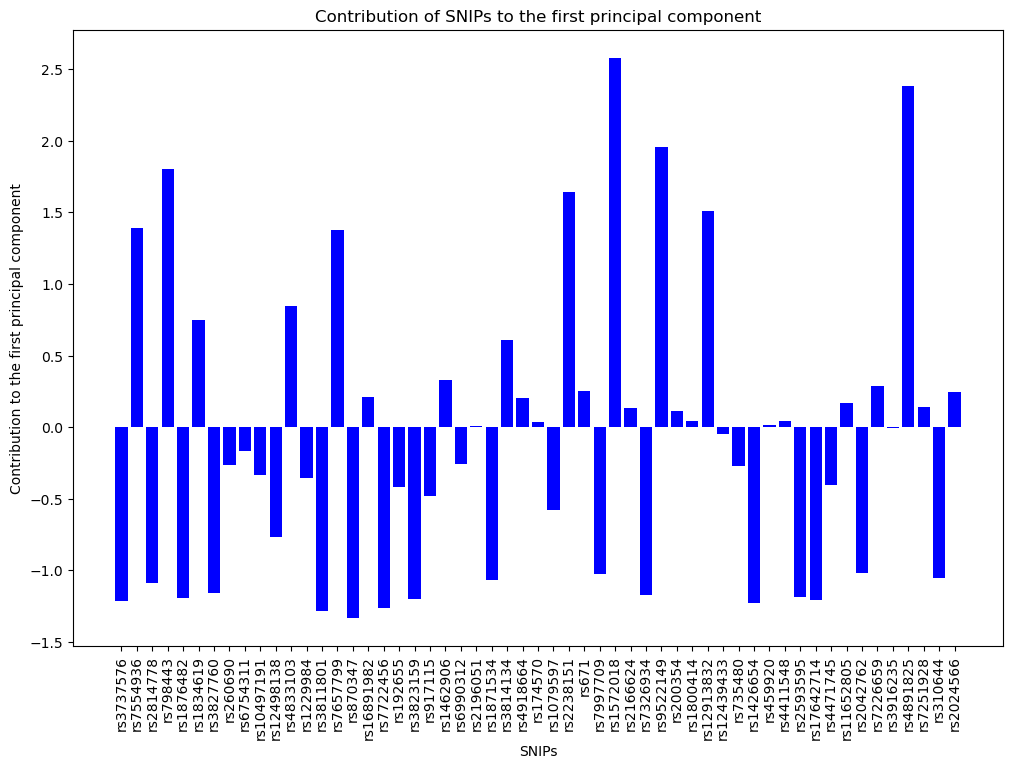

In [33]:
## FIRST PRINCIPAL COMPONENT
# Sum the contributions of each SNIP to the first principal component
num_snips = len(X.columns)
snip_contributions = np.zeros(num_snips)

for i in range(num_snips):
    snip_contributions[i] = principal_components.iloc[2*i, 0] + principal_components.iloc[2*i+1, 0]

# Plot the SNIP contributions to the first principal component
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(num_snips), snip_contributions, tick_label=X.columns, color='blue')
plt.xticks(rotation=90)
plt.xlabel('SNIPs')
plt.ylabel('Contribution to the first principal component')
plt.title('Contribution of SNIPs to the first principal component')
plt.show()

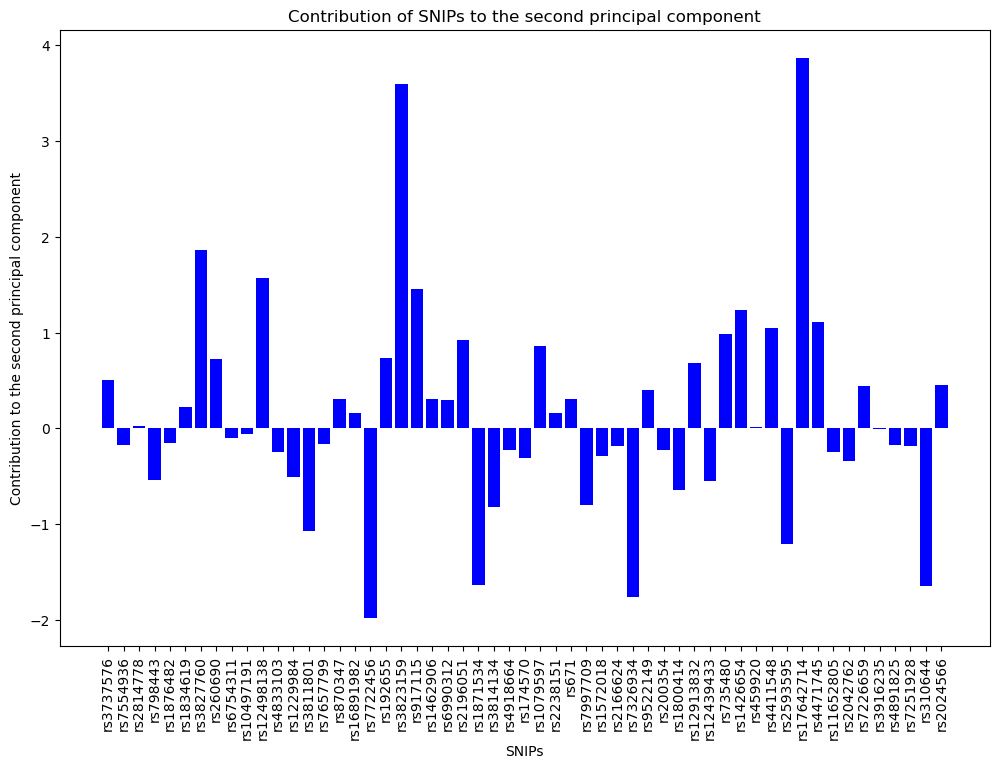

In [34]:
## SECOND PRINCIPAL COMPONENT
# Sum the contributions of each SNIP to the second principal component
snip_contributions = np.zeros(num_snips)

for i in range(num_snips):
    snip_contributions[i] = principal_components.iloc[2*i, 1] + principal_components.iloc[2*i+1, 1]

# Plot the SNIP contributions to the second principal component
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(num_snips), snip_contributions, tick_label=X.columns, color='blue')
plt.xticks(rotation=90)
plt.xlabel('SNIPs')
plt.ylabel('Contribution to the second principal component')
plt.title('Contribution of SNIPs to the second principal component')
plt.show()